In [1]:
#WordCloud for iNaturalist project descriptions
  
# importing modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
import re
from stop_words import get_stop_words

In [2]:
def cleanhtml(raw_html):
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', raw_html)
  return cleantext
  

In [3]:
# Read projects file  
df = pd.read_csv(r"iNatProject.csv", encoding ="utf-8") 
  

# Remove projects with one or no observers and at least on identifier.

In [24]:
df = df[(df['observers']>1) & (df['identifiers']>=1)]

In [4]:
comment_words = '' 
#stopwords = set(STOPWORDS) 
#stopwords.update(["de", "la", "bioblitz","will","que","se",""])
stopwords = get_stop_words('en')
stopwordsES = get_stop_words('es')
#stopwords = set(stopwords)


In [6]:
stopwords.extend(stopwordsES)

In [10]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'al',
 'algo',
 'algunas',
 'algunos',
 'all',
 'am',
 'an',
 'and',
 'ante',
 'antes',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'bioblitz',
 'both',
 'but',
 'by',
 "can't",
 'cannot',
 'como',
 'con',
 'contra',
 'could',
 "couldn't",
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'donde',
 'down',
 'durante',
 'during',
 'e',
 'each',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos'

In [11]:
stopwords = set(stopwords)

In [12]:
stopwords.add('bioblitz')
stopwords.add('https')
stopwords.add('www')
stopwords.add('org')
stopwords.add('inaturalist')
stopwords.add('project')

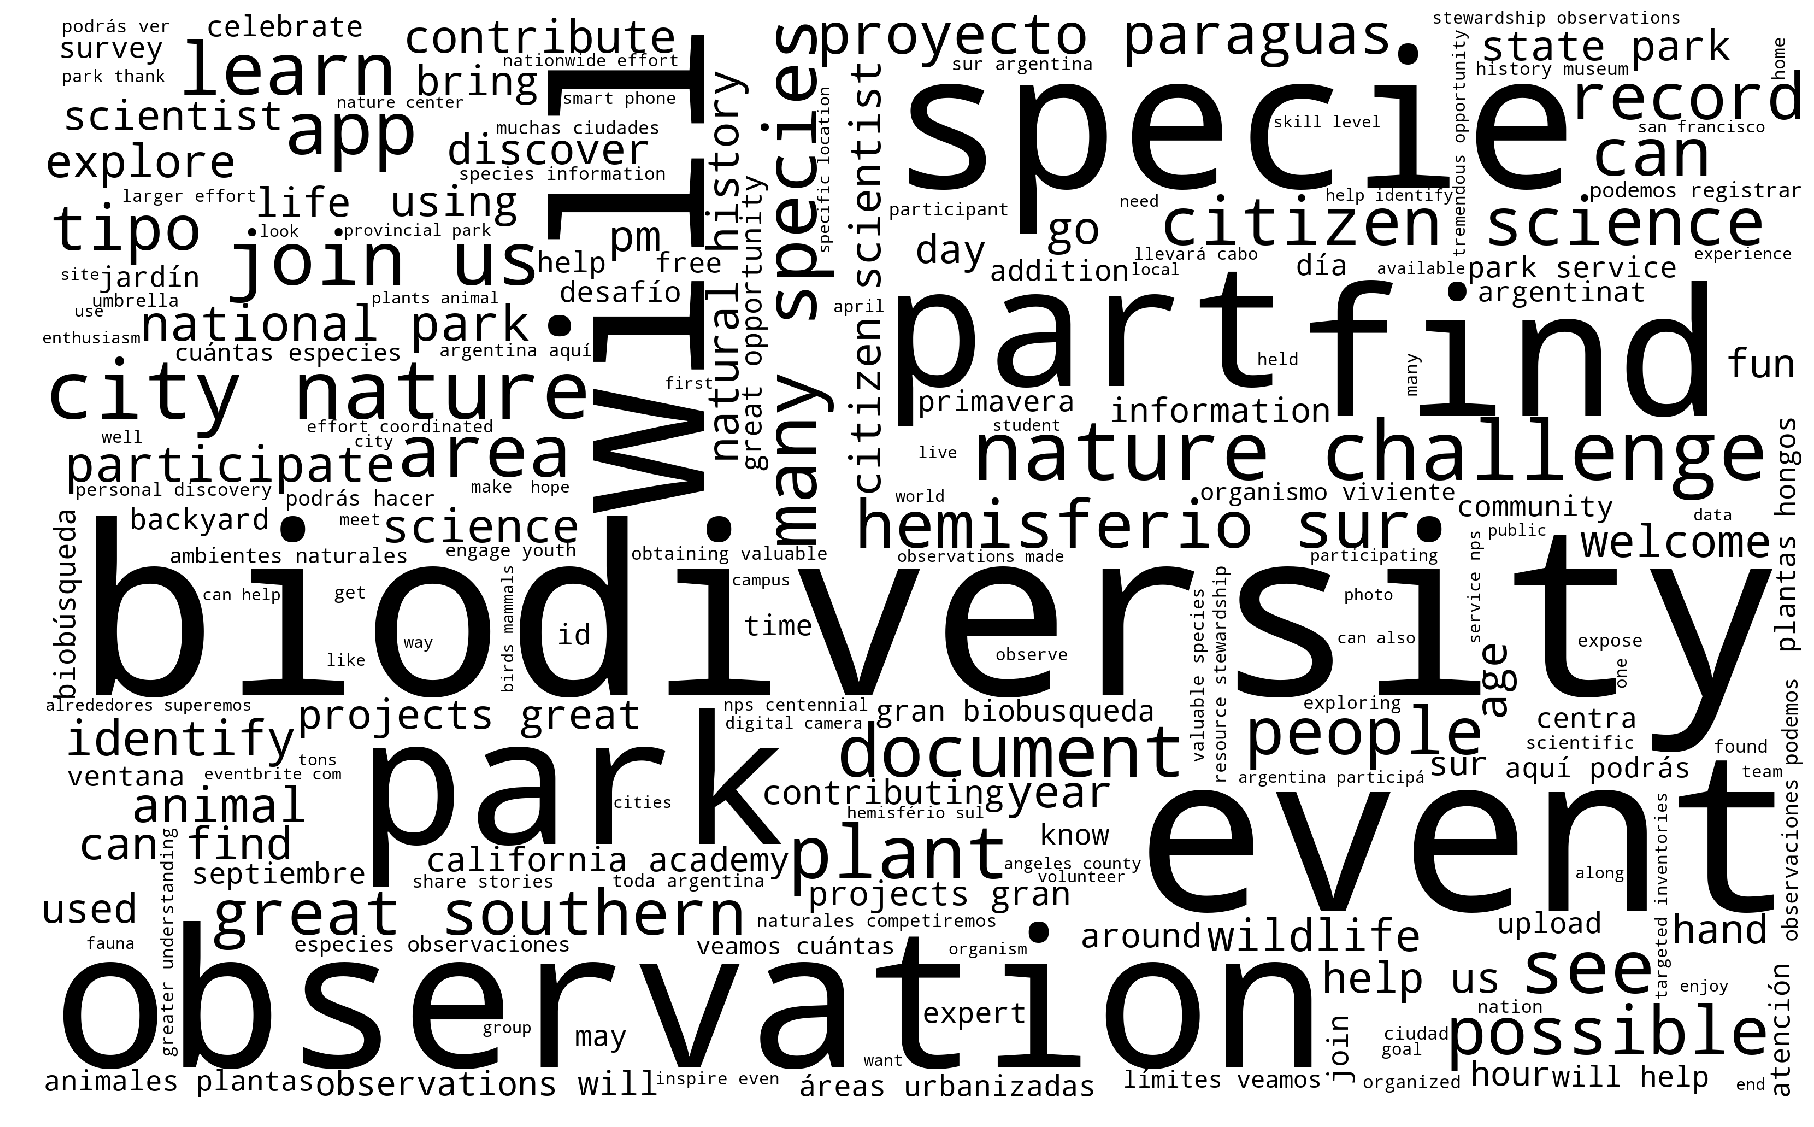

In [26]:
# iterate through the csv file 
for val in df.description: 

    # typecaste each val to string 
    val = str(val) 
    val = cleanhtml(val)
    # split the value 
    tokens = val.split() 
    #print(tokens)      
    # Converts each token into lowercase 
    for i in range(len(tokens)):

        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 3236, height = 2000, 
                background_color ='white', 
                stopwords = stopwords, 
                #normalize_plurals = False,
                color_func=lambda *args, **kwargs: (0,0,0),
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (25, 25), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [29]:
wordcloud.to_file("wordcloud.jpg")